In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
data= pd.read_csv('seattleWeather_1948-2017.csv')

In [53]:
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [55]:
data.isna().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [56]:
data[pd.isnull(data['PRCP'])]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [57]:
data[pd.isnull(data['RAIN'])]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


IF YOU HAVE SUFFICIENT DATA THEN WE CAN DROP OF DATA BY data.dropna() method, like we have 25551 values. so droping of 3 will not impact data.

IF MISSING VALUES ARE LESS THAN 20% then drop the values.

IF MISSING VALUES ARE BTW 20-75% then WILL DO A MISSIMG VALUE IMPUTATION.
F MISSING VALUES ARE GREATER THAN 75% WE WILL DROP THE variable containing missing values

In [58]:
### To findout the percentage is missing value/ total values * 100 
percentage_of_missing_values_PRCP =  ( data['PRCP'].isna().sum()/data.shape[0] ) * 100
percentage_of_missing_values_PRCP

0.011741223435481977

In [59]:
percentage_of_missing_values_RAIN =  ( data['RAIN'].isna().sum()/data.shape[0] ) * 100
percentage_of_missing_values_RAIN

0.011741223435481977

In [60]:
len(data) # this is giving the list, but shape attributes are giving the records.

25551

#RAIN IS NOT A NUMERIC TO GET THE DISTINCT CATEGORIES AND THEIR COUNT 

In [61]:
data.RAIN.value_counts()

RAIN
False    14648
True     10900
Name: count, dtype: int64

categories occurs with more frequency is the MODE so MODE IS False

In [62]:
#imputing(filling) the missing values for PRCP column as PRCP is NUMERIC we can get the mean value

data['PRCP'] = data['PRCP'].fillna(data['PRCP'].mean())

In [63]:
#imputing(filling) the missing values for RAIN column as RAIN is CATAGORICAL VALUE we can get the mode value
#mode ()[0] means select the first mode like false is first mode here

data['RAIN'] = data['RAIN'].fillna(data['RAIN'].mode()[0])

In [64]:
data.isna().sum() # again check the missing values

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

In [65]:
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [66]:
data[pd.isnull(data['PRCP'])]

,DATE,PRCP,TMAX,TMIN,RAIN


by default it considered as string. Now the below to_datetime convert it into datetime format

In [67]:
data['DATE']= pd.to_datetime(data['DATE']) 

Encoding of rain as values are in true false basically into numeric counterpart

In [81]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [82]:
data['RAIN'] = encoder.fit_transform(data['RAIN']) # FITTING DATA AND ALIGNED THE OBJECT
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    25551 non-null  datetime64[ns]
 1   PRCP    25551 non-null  float64       
 2   TMAX    25551 non-null  int64         
 3   TMIN    25551 non-null  int64         
 4   RAIN    25551 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 998.2 KB


In [83]:
X = data.drop(['DATE', 'RAIN'], axis=1)
Y = data['RAIN']

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size =0.25, random_state=42)

In [85]:
X_train.shape

(19163, 3)

In [86]:
X_test.shape

(6388, 3)

In [171]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [172]:
y_pred = model.predict(X_test)
print(y_pred)

[1 1 1 ... 0 1 0]


In [173]:
Y_test

5816     1
25051    1
512      1
10870    0
4306     0
        ..
16123    1
18413    0
4660     0
15068    1
7571     1
Name: RAIN, Length: 6388, dtype: int64

In [174]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
r2 = confusion_matrix(Y_test, y_pred)
print(r2)

[[3690   15]
 [ 458 2225]]


TN FP
FN TP

<Axes: >

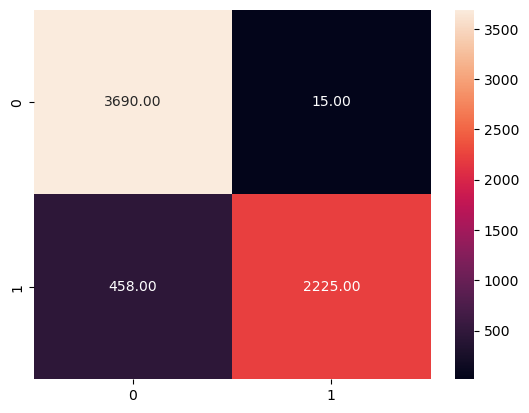

In [175]:
sns.heatmap(r2, annot=True, fmt='.2f')

ACCURACY ==========TP+ TN / TP+TN+FP+FN

In [176]:
accuracy = accuracy_score(Y_test, y_pred)
print(accuracy)

0.9259549154664997


PRECISION ======== TP / TP+FP #Pointing to the prediction part

In [177]:
precision = precision_score(Y_test, y_pred)
print(precision)

0.9933035714285714


RECALL OF 0 CLASS ========= TN/ TN+TP #Pointing towards the actual part

In [178]:
recall = recall_score(Y_test, y_pred)
print(recall)

0.8292955646664182


F1- SCORE is harmonic mean of precision and recall ====== 2*(Precision * Recall)/ Precision+ Recall

In [179]:
F1_SCORE = classification_report(Y_test, y_pred)
print(F1_SCORE)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3705
           1       0.99      0.83      0.90      2683

    accuracy                           0.93      6388
   macro avg       0.94      0.91      0.92      6388
weighted avg       0.93      0.93      0.92      6388



In [180]:
import joblib 


In [181]:
#dump the model
joblib.dump(model, 'Rain_Prediction_model.pkl') 
print("Model is saved")

Model is saved


In [182]:
#load the model back
MODEL1 = joblib.load('Rain_Prediction_model.pkl')

In [183]:
PRCP = 0
TMAX = 45
TMIN = 35
pred = MODEL1.predict([[PRCP, TMAX, TMIN]])
if pred==1 :
    print("RAIN")
else:
    print("NO RAIN")
    

NO RAIN


C:\Users\nehagour\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ROC - Receiver operator : Graphical representation of how your model is performing across different classification threshold. 
TPR vs FPR  graph 
AUC - Area Under Curve :: High AUC, better Classifier:: AUC identify the ROC ::This quantify the classification of TPR  and FPR



In [184]:
pred_prob = model.predict_proba(X_test)

In [185]:
pred_prob

array([[2.99192635e-01, 7.00807365e-01],
       [1.97336141e-02, 9.80266386e-01],
       [3.70614926e-02, 9.62938507e-01],
       ...,
       [9.16139971e-01, 8.38600289e-02],
       [6.47952348e-05, 9.99935205e-01],
       [6.39960952e-01, 3.60039048e-01]])

In [186]:
pred_prob[:,1]

array([0.70080736, 0.98026639, 0.96293851, ..., 0.08386003, 0.9999352 ,
       0.36003905])

In [187]:
Y_test

5816     1
25051    1
512      1
10870    0
4306     0
        ..
16123    1
18413    0
4660     0
15068    1
7571     1
Name: RAIN, Length: 6388, dtype: int64

In [188]:
from sklearn.metrics import roc_auc_score, roc_curve

In [189]:
auc_score = roc_auc_score(Y_test, pred_prob[:,1])
auc_score

0.9793039897832255

In [190]:
fpr, tpr, thresh = roc_curve(Y_test, pred_prob[:,1])

In [191]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99622132, 0.99730094,
       1.        ])

In [192]:
tpr

array([0.        , 0.03988073, 0.04286247, ..., 1.        , 1.        ,
       1.        ])

In [193]:
thresh

array([       inf, 1.        , 1.        , ..., 0.00614756, 0.00570804,
       0.00293478])

In [194]:
thresh.shape

(1440,)

In [195]:
fpr.shape

(1440,)

In [196]:
tpr.shape

(1440,)

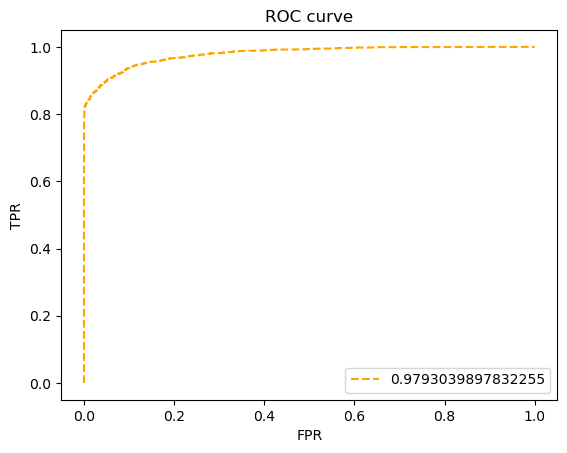

In [197]:
fig,ax=plt.subplots()
ax.set_facecolor('white')
plt.plot(fpr,tpr,linestyle = '--', color = 'orange', label=auc_score)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt. title('ROC curve')
plt.legend(loc='best')